<a href="https://colab.research.google.com/github/gvalexis/cagv_pcd/blob/main/Tarea_1_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gutenbergpy

In [150]:
import gutenbergpy.textget
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import ngrams

# Analisis de texto de la obra literaria El arbol de la ciencia

Extraccion del libro usando el modulo gutenbergpy

In [151]:
def obtener_libro(id):
    raw_book = gutenbergpy.textget.get_text_by_id(id) # with headers
    clean_book = gutenbergpy.textget.strip_headers(raw_book) # without headers
    return clean_book, raw_book

In [152]:
libro_limpio, libro  = obtener_libro(60464)
str_libro = libro_limpio.decode()
list_libro = str_libro.split("\n")
libro_filitrado = list(filter(None, list_libro))
str_libro = libro_limpio.decode()

In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')

Realizamos la limpieza del texto borrando algunos stop words y signos de puntuacion ademas de su tokenizacion para poder realizar el analisis pertienente

In [154]:
texto_limpio = re.sub(r'[^\w\s]', '', str_libro.lower())
stop_words = set(stopwords.words('spanish'))
stop_words.add('si')
stop_words.add('_el')
stop_words.add('ser')
stop_words.add('don')
stop_words.add('doña')
stop_words.add('san')

tokens = word_tokenize(texto_limpio)
texto_filtrado = [word for word in tokens if word not in stop_words]
df = pd.DataFrame(texto_filtrado)
conteo_frecuencias = df.value_counts()

Aqui se muestra las 15 palabras mas usadas en el libro, podemos inferir que los personajes principales es Andres, Lulu y la historia se dedsarrolla en un pueblo

In [155]:
df_frecuencias = conteo_frecuencias.to_frame()
df_frecuencias.reset_index(inplace = True)
df_frecuencias.columns = ['token', 'conteo']
df_frecuencias.head(15)

,token,conteo
0,andrés,590
1,usted,275
2,casa,196
3,hombre,172
4,lulú,166
5,hurtado,148
6,vida,146
7,mujer,121
8,dos,116
9,después,92


Aqui se muestra una nube de palabras de cuales son las palabras mas usadas en la obra literaria

(-0.5, 399.5, 199.5, -0.5)

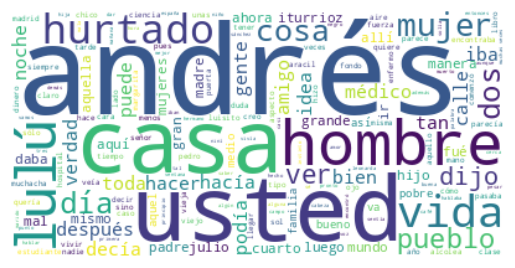

In [156]:
wordcloud = WordCloud(max_font_size=100, max_words=200, background_color="white").generate(' '.join(texto_filtrado))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

La grafica que se muestra a continuacion es la frecuencia de la nube de palabrasa que se creo anteriormente

<Axes: xlabel='token'>

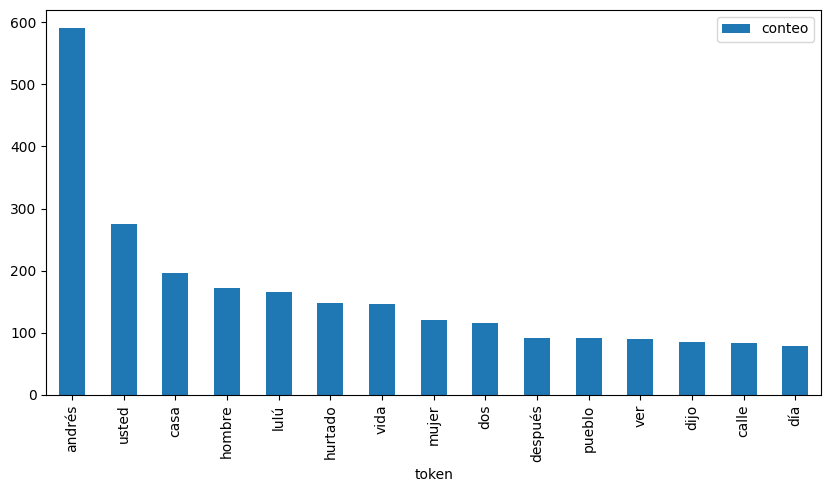

In [157]:
df_frecuencias.head(15).plot.bar(x='token', y='conteo', figsize=(10, 5))

posteriormente hice el analisis de un bigrama el cual se pueden ver que el nombre de Andres Hurtado se repite 29 veces e ironicamente "muchas veces" aparece muchas veces

In [158]:
frase =  ' '.join(texto_filtrado)
n = 2 # un bigrama

df_grams = pd.DataFrame(ngrams(frase.split(), n), columns=['token1', 'token2'])
df_grams["Bigramas"]= df_grams["token1"] + " " + df_grams["token2"]
df_grams.head()
df_grams_counts= df_grams["Bigramas"].value_counts()
df_grams_counts.head(15)

,count
Bigramas,
muchas veces,29
tío garrota,18
andrés hurtado,17
julio aracil,16
andrés fué,15
varias veces,14
árbol ciencia,12
mismo tiempo,12
dijo andrés,11


<Axes: xlabel='Bigramas'>

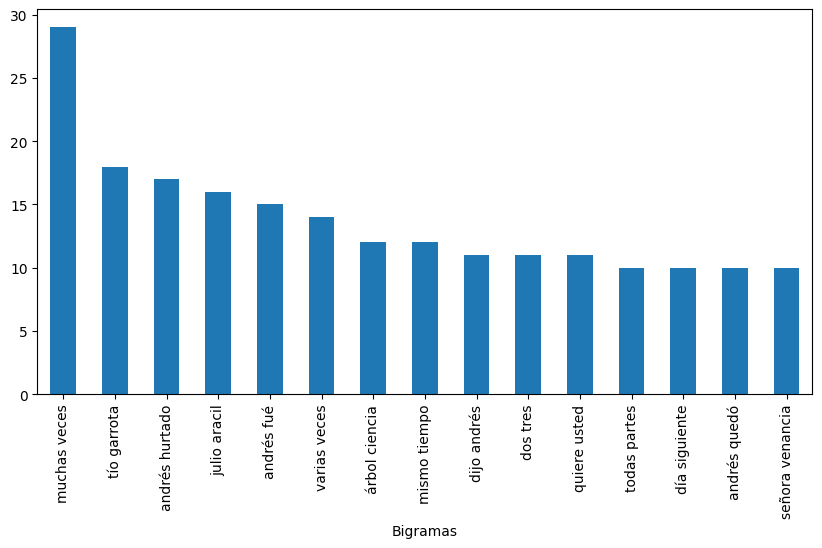

In [159]:
df_grams_counts.head(15).plot.bar(x='Bigramas', y='conteo', figsize=(10, 5))

por ultimo se realizo un trigrama en el cual aparecio otro personaje relevante para la historia llamado "director masón ilustrado"

In [160]:
frase =  ' '.join(texto_filtrado)
n = 3 # un trigrama

df_grams3 = pd.DataFrame(ngrams(frase.split(), n), columns=['token1', 'token2', 'token3'])
df_grams3["trigramas"]= df_grams3["token1"] + " " + df_grams3["token2"]+ " " + df_grams3["token3"]
df_grams_counts3= df_grams3["trigramas"].value_counts()
df_grams_counts3.head(15)

,count
trigramas,
director masón ilustrado_,5
mujer tío garrota,4
aracil montaner hurtado,4
capaz dar salto,3
capilla instituto isidro,3
antigua capilla instituto,3
árbol ciencia árbol,3
ciencia árbol vida,3
pasaba vida leyendo,3


<Axes: xlabel='trigramas'>

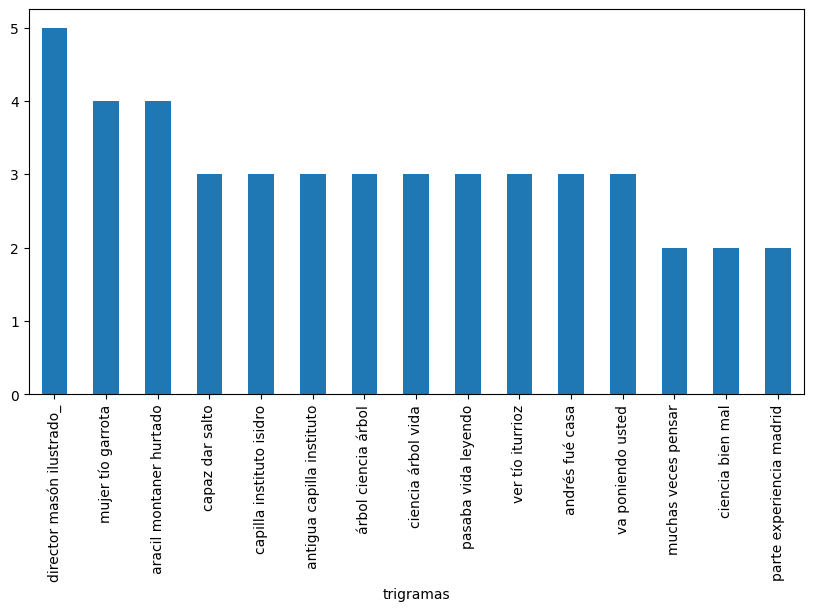

In [161]:
df_grams_counts3.head(15).plot.bar(x='Trigramas', y='conteo', figsize=(10, 5))

# Segundo texto
### Mensaje de la presidenta de los Estados Unidos Mexicanos, Claudia Sheinbaum Pardo

In [162]:
import requests
from bs4 import BeautifulSoup

url = "https://www.gob.mx/presidencia/articulos/version-estenografica-mensaje-de-la-presidenta-de-los-estados-unidos-mexicanos-claudia-sheinbaum-pardo"
response = requests.get(url)
if response.status_code == 200:
    page_content = response.content
    soup = BeautifulSoup(page_content, 'html.parser')
    article_body = soup.find('div', class_='article-body')
    if article_body:
        text = article_body.get_text(separator='\n', strip=True)
    else:
        print("No se pudo encontrar el cuerpo del artículo.")
else:
    print(f"Error al acceder a la página. Código de estado: {response.status_code}")


se retiraron algunas palabras, como el nombre de la presidenta, y algunas otras mas

In [163]:
texto_limpio = re.sub(r'[^\w\s]', '', text.lower())
stop_words = set(stopwords.words('spanish'))
stop_words.add('presidenta')
stop_words.add('intervención')
stop_words.add('moderadora')
stop_words.add('va')
stop_words.add('van')
stop_words.add('claudia')
stop_words.add('sheinbaum')
stop_words.add('pardo')
tokens = word_tokenize(texto_limpio)
texto_filtrado = [word for word in tokens if word not in stop_words]
df = pd.DataFrame(texto_filtrado)
conteo_frecuencias = df.value_counts()
conteo_frecuencias.head(15)

,count
0,
vamos,79
méxico,50
programa,25
país,24
república,23
pueblo,22
mujeres,19
todas,18
nacional,17


en las siguiente nube de palabraas podemos ver que el discurso menciona mucho a Mexico y tiene un discurso dirigido a la salud el bienestar y las mujeres

(-0.5, 399.5, 199.5, -0.5)

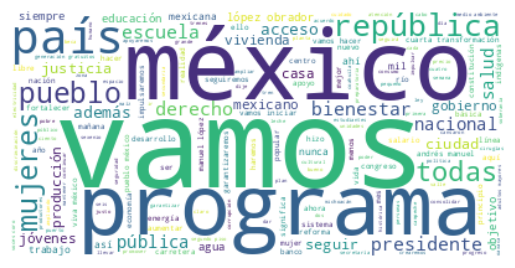

In [164]:
wordcloud = WordCloud(max_font_size=100, max_words=200, background_color="white").generate(' '.join(texto_filtrado))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

<Axes: xlabel='token'>

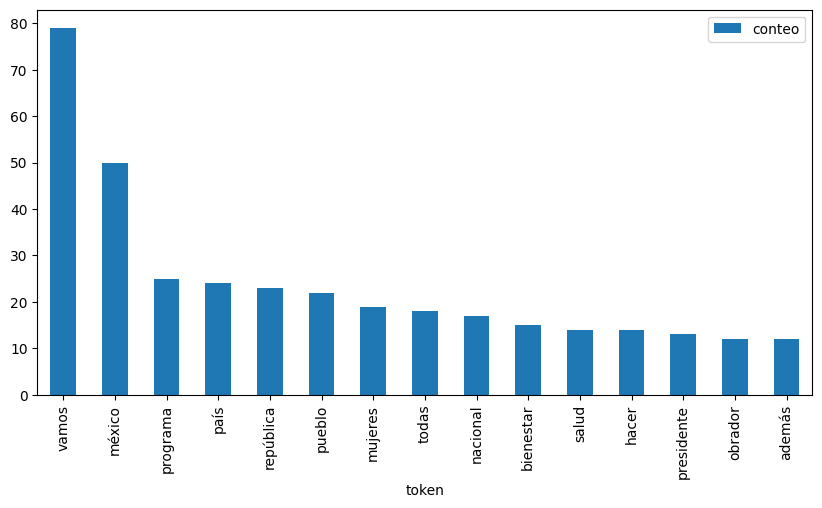

In [165]:
df_frecuencias = conteo_frecuencias.to_frame()
df_frecuencias.reset_index(inplace = True)
df_frecuencias.columns = ['token', 'conteo']
df_frecuencias.head(15).plot.bar(x='token', y='conteo', figsize=(10, 5))

Revisando el bigrama del discurso podemos ver que se menciona mucho al expresidente

In [166]:
frase =  ' '.join(texto_filtrado)
n = 2 # un bigrama

df_grams = pd.DataFrame(ngrams(frase.split(), n), columns=['token1', 'token2'])
df_grams["Bigramas"]= df_grams["token1"] + " " + df_grams["token2"]
df_grams.head()
df_grams_counts= df_grams["Bigramas"].value_counts()
df_grams_counts.head(15)

,count
Bigramas,
lópez obrador,10
vamos hacer,8
andrés manuel,8
pueblo méxico,8
cuarta transformación,8
manuel lópez,7
vamos iniciar,7
viva méxico,6
voces coro,5


<Axes: xlabel='Bigramas'>

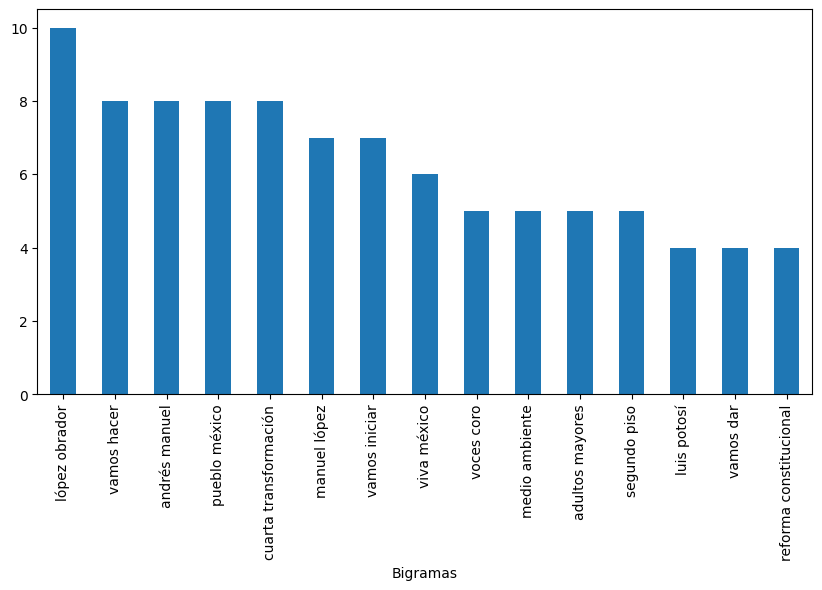

In [167]:
df_grams_counts.head(15).plot.bar(x='Bigramas', y='conteo', figsize=(10, 5))

y con relacion al trigrama sigue mostrando que habla mucho del ex presidente, asi como hacer referencias al movimiento de la cuarta transformacion, tambien se puede observar que no aparece el nombre de ningun partido polittico

In [168]:
frase =  ' '.join(texto_filtrado)
n = 3 # un bigrama

df_grams3 = pd.DataFrame(ngrams(frase.split(), n), columns=['token1', 'token2', 'token3'])
df_grams3["trigramas"]= df_grams3["token1"] + " " + df_grams3["token2"]+ " " + df_grams3["token3"]
df_grams_counts3= df_grams3["trigramas"].value_counts()
df_grams_counts3.head(15)

,count
trigramas,
manuel lópez obrador,7
andrés manuel lópez,7
segundo piso cuarta,4
piso cuarta transformación,4
viva méxico viva,4
san luis potosí,3
presidente andrés manuel,3
presidente lópez obrador,3
vamos impulsar programa,3


<Axes: xlabel='trigramas'>

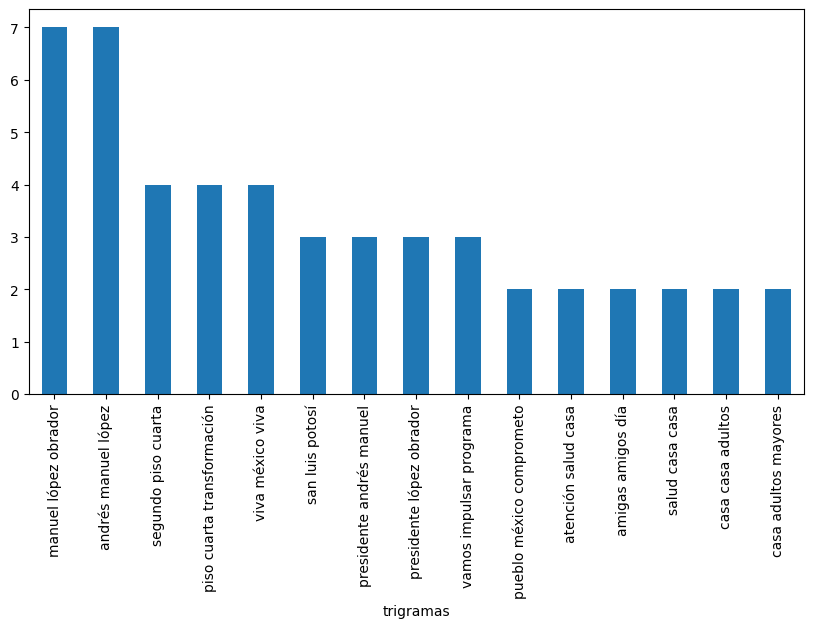

In [169]:
df_grams_counts3.head(15).plot.bar(x='Trigramas', y='conteo', figsize=(10, 5))